In [2]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy.random as npr
import numpy as np

等分散性を仮定した2標本間の母平均の差のｔ検定

In [3]:
d1 = pd.read_csv("./data/tokyo_osaka_salary.csv", encoding="cp932", skiprows = 1)
d1.head()

,number,place,salary
0,1,Tokyo,435.9
1,2,Tokyo,622.0
2,3,Tokyo,518.4
3,4,Tokyo,941.7
4,5,Tokyo,655.6


<AxesSubplot:xlabel='place', ylabel='salary'>

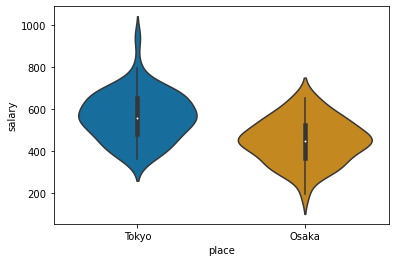

In [4]:
sns.violinplot(x = 'place', y='salary', data=d1, palette='colorblind')

In [8]:
tokyo_s = d1.salary[d1.place=='Tokyo']
osaka_s = d1.salary[d1.place=='Osaka']

In [20]:
# 等分散性を数値で見てみる
print(tokyo_s.std(ddof=len(tokyo_s)-1))
print(osaka_s.std(ddof=len(osaka_s)-1))
# 検定しないと何とも言えん

# 2.無相関は当然
# 3.アウトカムは正規分布に従っているといえそう
# (東京はqqプロット正規性の検定なりしたほうがよさそう)

850.5289631711447
681.6390827344857


In [11]:
ss.ttest_ind(tokyo_s, osaka_s, equal_var=True) #等分散仮定
# ss.ttest_ind(tokyo_s, osaka_s, equal_var=False) #Welchiのt検定

Ttest_indResult(statistic=5.327799301401295, pvalue=6.149942080415932e-07)

In [15]:
# 2標本間の母分散が等しいかどうか検定せなあかんか？
d1.groupby(['place']).mean()

,number,salary
place,,
Osaka,80,451.504444
Tokyo,29,567.307018
